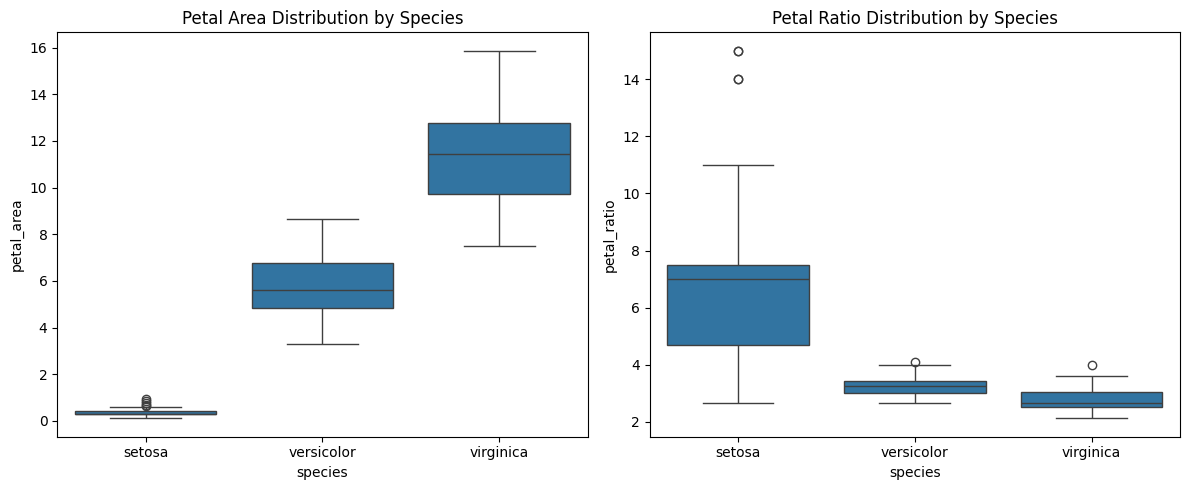

<Figure size 1200x1200 with 0 Axes>

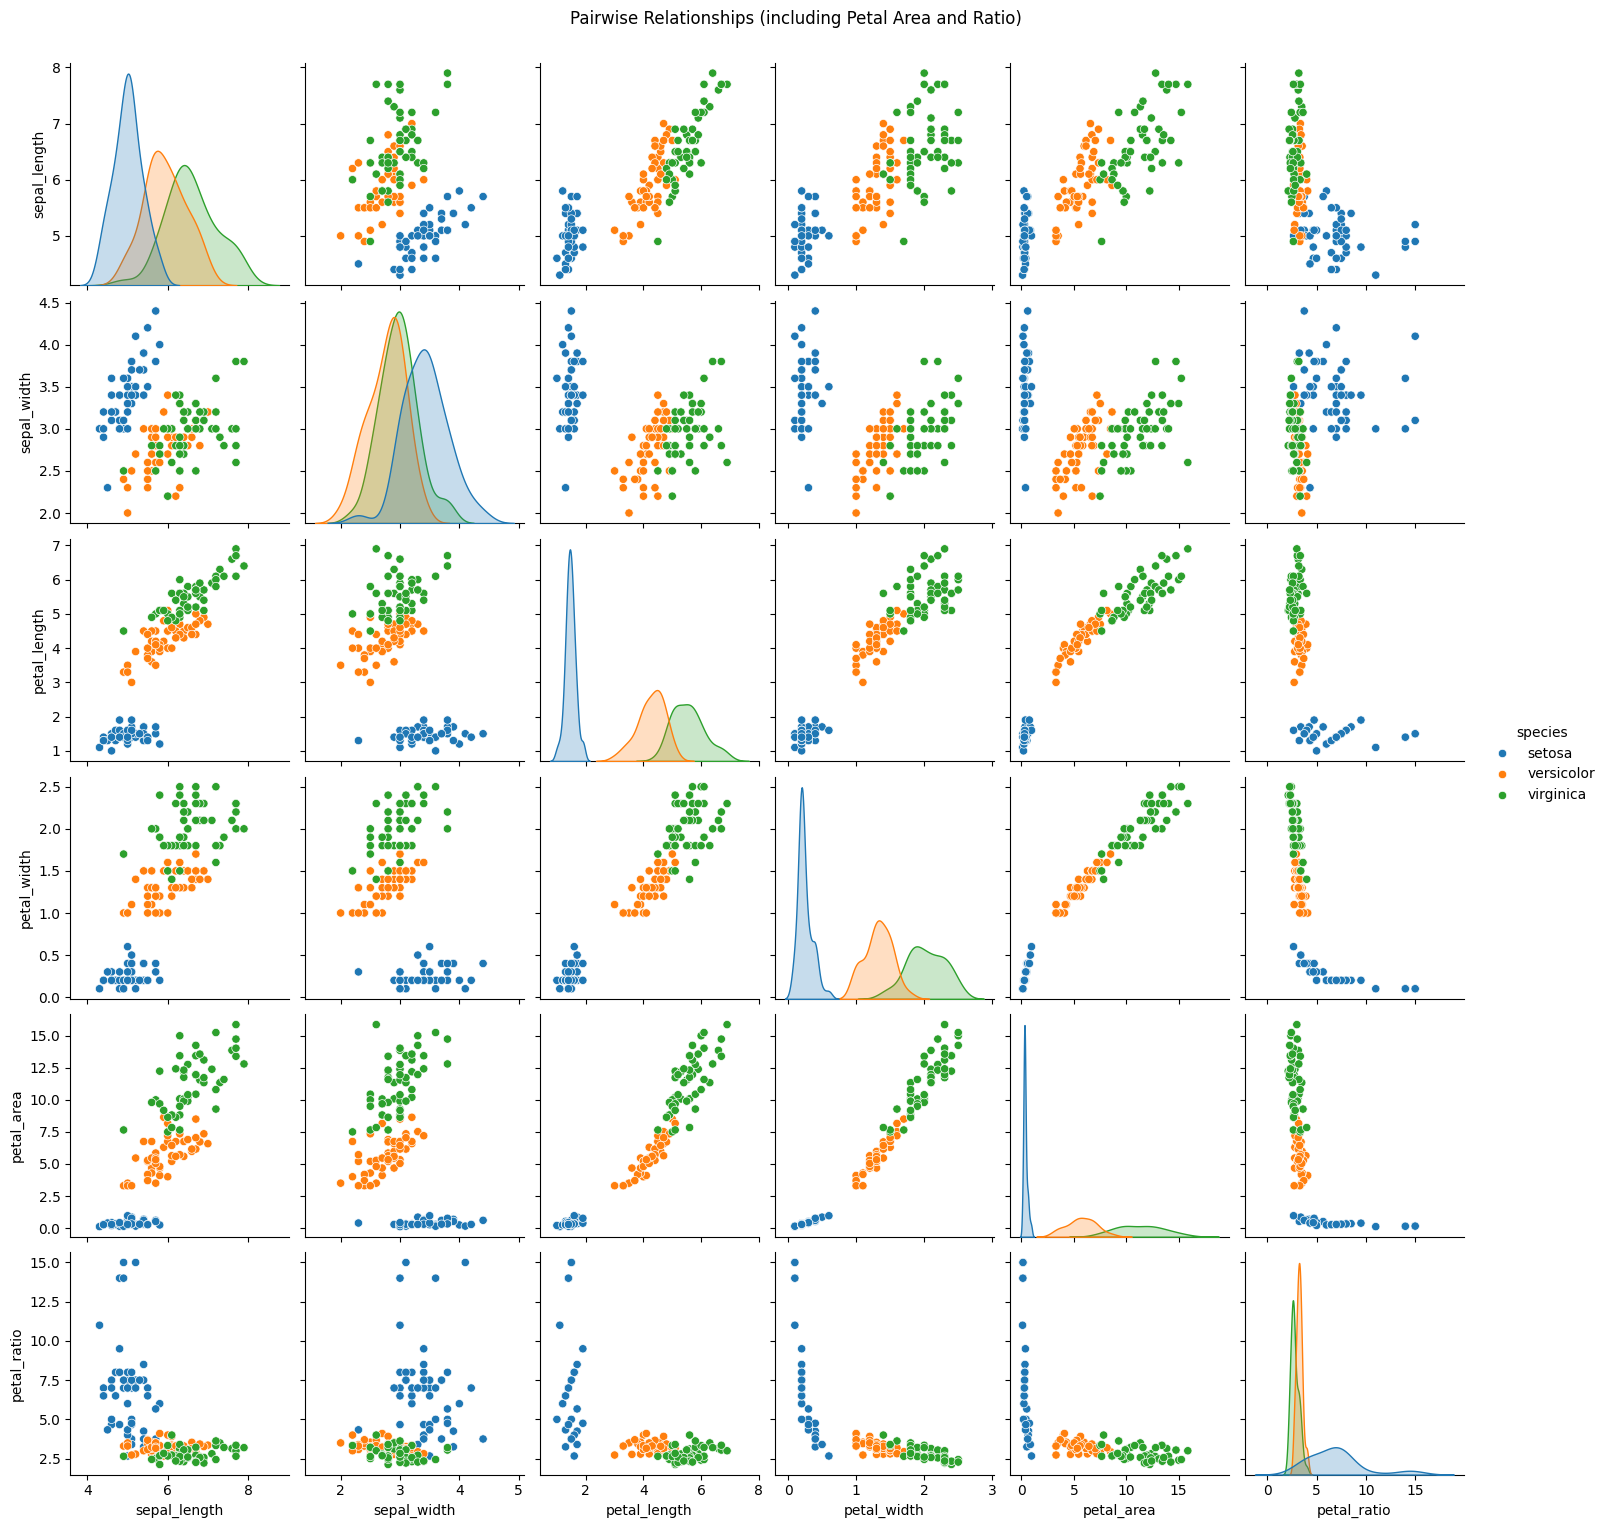


Mean of features by species (including new features):
            sepal_length  sepal_width  petal_length  petal_width  petal_area  \
species                                                                        
setosa             5.006        3.428         1.462        0.246      0.3656   
versicolor         5.936        2.770         4.260        1.326      5.7204   
virginica          6.588        2.974         5.552        2.026     11.2962   

            petal_ratio  
species                  
setosa         6.907961  
versicolor     3.242834  
virginica      2.780661  

Standard deviation of features by species (including new features):
            sepal_length  sepal_width  petal_length  petal_width  petal_area  \
species                                                                        
setosa          0.352490     0.379064      0.173664     0.105386    0.181155   
versicolor      0.516171     0.313798      0.469911     0.197753    1.368403   
virginica       0.635880 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris_df = sns.load_dataset('iris')

# --- Feature Engineering ---

# Assumption: Petal area might be a good discriminator of species.
# Create a new feature 'petal_area'
iris_df['petal_area'] = iris_df['petal_length'] * iris_df['petal_width']

# Assumption: The ratio of petal length to petal width might also be useful.
# Create a new feature 'petal_ratio'
# Handle potential division by zero by adding a small epsilon
epsilon = 1e-6
iris_df['petal_ratio'] = iris_df['petal_length'] / (iris_df['petal_width'] + epsilon)

# --- Verify Utility (Visualization) ---

# Visualize the distribution of the new features by species using box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='petal_area', data=iris_df)
plt.title('Petal Area Distribution by Species')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='petal_ratio', data=iris_df)
plt.title('Petal Ratio Distribution by Species')

plt.tight_layout()
plt.show()

# Visualize the pairwise relationships including the new features using a pair plot with hue
plt.figure(figsize=(12, 12))
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairwise Relationships (including Petal Area and Ratio)', y=1.02)
plt.show()

# --- Verify Utility (Descriptive Statistics) ---

# Calculate the mean and standard deviation of the new features per species
print("\nMean of features by species (including new features):")
print(iris_df.groupby('species').mean())

print("\nStandard deviation of features by species (including new features):")
print(iris_df.groupby('species').std())